## Imports

In [1]:
#list all of the imports I used in this notebook or in a module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

#import my personal modules created for this report
import wrangle as w
import explore as e
import model as m

In [2]:
#import unclean data from Codeup mySQL server
telco_unclean = w.get_telco_data()

In [3]:
def clean_telco(df):
    '''Prepares acquired teclo data for exploration'''

    df.drop_duplicates(inplace=True)
    df = df[df.total_charges!=' ']
    df.total_charges = df.total_charges.astype(float)
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    df.drop(columns=['customer_id','payment_type_id', 'internet_service_type_id','contract_type_id'], inplace=True)
    
    return df

In [4]:
#clean the data to prep for exploration
telco = clean_telco(telco_unclean)

# splitting data into train, validate, and test
train, validate, test = w.train_validate_test_split(telco, "churn_encoded")

In [5]:
#show the first few rows of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4572 entries, 22 to 5394
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4572 non-null   object 
 1   senior_citizen         4572 non-null   int64  
 2   partner                4572 non-null   object 
 3   dependents             4572 non-null   object 
 4   tenure                 4572 non-null   int64  
 5   phone_service          4572 non-null   object 
 6   multiple_lines         4572 non-null   object 
 7   online_security        4572 non-null   object 
 8   online_backup          4572 non-null   object 
 9   device_protection      4572 non-null   object 
 10  tech_support           4572 non-null   object 
 11  streaming_tv           4572 non-null   object 
 12  streaming_movies       4572 non-null   object 
 13  paperless_billing      4572 non-null   object 
 14  monthly_charges        4572 non-null   float64
 15  tot

In [54]:
train.monthly_charges[train.churn == "Yes"].mean()

73.65695473251024

In [6]:
train.monthly_charges[train.churn == "Yes"].mean() - train.monthly_charges.mean()

9.4859573571823

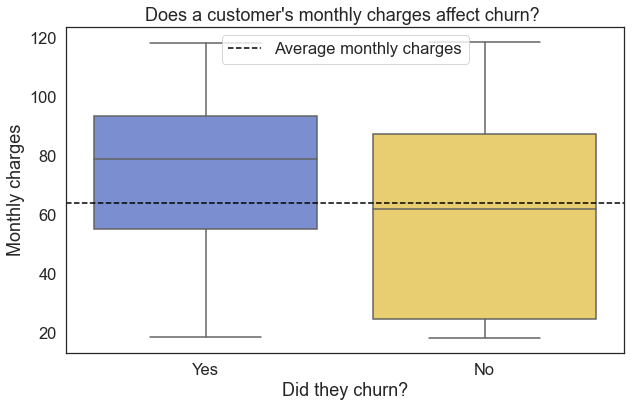

In [14]:
#set font size
sns.set(font_scale=1.5)
#set plot style
sns.set_style('white')

#set size of the graphs
fig, ax = plt.subplots(1,1, figsize=(10,6))


average = train["monthly_charges"].mean()
sns.boxplot(data=train, x='churn', y="monthly_charges", palette=['#6d86dd','#fdd85d'], order=["Yes", "No"])
plt.xlabel(xlabel="Did they churn?")
plt.ylabel(ylabel="Monthly charges")
plt.title("Does a customer's monthly charges affect churn? ")
plt.axhline(average, ls='--', color='black', label="Average monthly charges") 
plt.legend(loc = 'upper center', frameon=True)
plt.savefig('monthly_charges1.png')
plt.show()


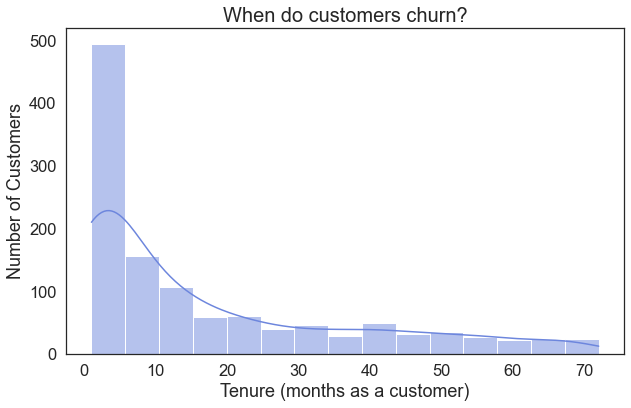

In [7]:
plt.figure(figsize = (10, 6))
plt.title('When do customers churn?', fontsize = 20)

sns.histplot(data = train[train.churn == "Yes"], x = 'tenure', kde=True, color='#6d86dd')
plt.ylabel(ylabel="Number of Customers")
plt.xlabel(xlabel="Tenure (months as a customer)")
plt.savefig('tenure.png')
plt.show()


In [16]:
churned_train = train[train.churn == "Yes"]

In [31]:
churned_train.tenure.mean()

17.578600823045267

In [20]:
tenure_counts = pd.DataFrame(churned_train.tenure.value_counts(normalize=True))

In [26]:
tenure_counts[tenure_counts.index <=12].sum()

tenure    0.572016
dtype: float64

In [46]:
train['contract_type'] = pd.Categorical(train['contract_type'], ['Month-to-month','One year', 'Two year'])







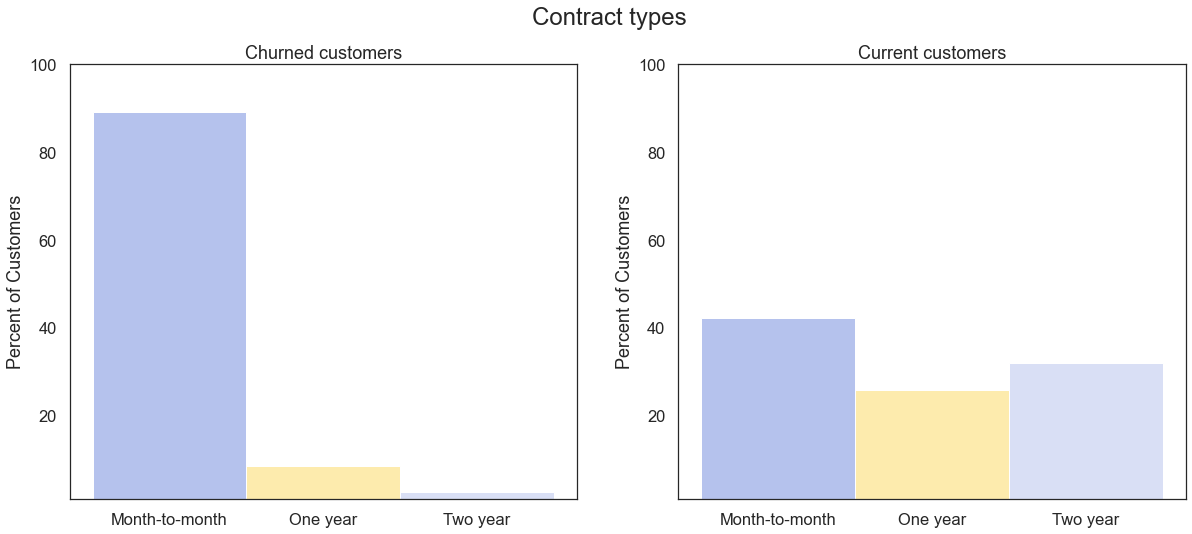

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
plt.suptitle('Contract types', fontsize=24)

#subplot 1 - churned

sns.histplot(data = train[train.churn == "Yes"], x="contract_type", hue='contract_type', stat="percent", palette=['#6d86dd','#fdd85d', "#b4c1ed"], ax=ax1, legend=False)
ax1.set_title('Churned customers')
ax1.set_ylabel(ylabel="Percent of Customers")
ax1.set_xlabel(xlabel="")
ax1.set_ylim(1, 100)
#ax1.legend(title='Contract Type',labels=['One year', 'Two year', 'Month-to-month'])

#subplot 2 - not churned
sns.histplot(data = train[train.churn == "No"], x="contract_type", hue='contract_type', stat="percent", palette=['#6d86dd','#fdd85d', "#b4c1ed"], ax=ax2, legend=False)
ax2.set_title('Current customers')
ax2.set_ylabel(ylabel="Percent of Customers")
ax2.set_xlabel(xlabel="")
ax2.set_ylim(1, 100)
#ax2.legend(title='Contract Type',labels=['One year', 'Two year', 'Month-to-month'], frameon=True)


plt.savefig('contract_types1.png')
plt.show()

In [49]:
train.contract_type[train.churn == "Yes"].value_counts(normalize=True)

Month-to-month    0.889712
One year          0.084774
Two year          0.025514
Name: contract_type, dtype: float64